# Final Combination of MVP 2 Work

Within this file we will combine all the data preprocessing done in the other file "MVP 2 Preprocessing" and run it into the kmeans clustering

In [13]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

np.random.seed(42)

In [14]:
# Establishing where to read files

from_path = "../SHARED/"

## Recompletion Data

In [15]:
# Loading in data
data_pd = pd.read_excel(from_path + "TO_TACC_RCOMPL.xlsx")

# Here we are double checking that we do not have any rows with no contractor
subset = data_pd[data_pd['CONTRACTOR'].notnull()]

# Next we will only be taking quantitative values to then impute the missing
# entries with the mean of the respective column
quant_df = subset.loc[:, subset.dtypes==float]
mean_repl = quant_df.isna().sum()
impute = lambda col: col.fillna(col.mean())
imputed_df = quant_df.apply(impute, axis=0)
imputed_df.dropna(inplace=True, axis=1)

In [16]:
mean_repl

FRAC_GRADIENT                     393
BREAKDOWN_PRESSURE                303
HYDROSTATIC_PRESSURE               43
TREAT_AVG_PRESSURE                  2
TREAT_MAX_PRESSURE                  2
TREAT_MIN_PRESSURE                746
PROPPANT_DESIGNED                   1
PROPPANT_IN_WELLBORE              415
AVG_HYDRAULIC_POWER                 3
MAX_PUMP_POWER                     49
MAX_PUMP_RATING                   260
TREAT_AVG_RATE                      2
TREAT_MAX_RATE                      2
TREAT_MIN_RATE                     10
POST_INSTANT_SHUT_IN_PRESSURE     478
INITIAL_SHUT_IN_PRESSURE           55
PRE_INSTANT_SHUT_IN_PRESSURE      404
STG_ELEMENT_TOP_DEPTH            1115
STG_ELEMENT_BOTTOM_DEPTH         1115
STG_INITIAL_PUMPING_PRESSURE      746
STG_FINAL_PUMPING_PRESSURE          2
STG_BREAKDOWN_PRESSURE            303
STG_VOLUME_RECOVERED              586
PUMPSONLINENO                     886
USERNUM1                          914
USERNUM3                          886
DURPUMP     

In [17]:
imputed_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,STG_BREAKDOWN_PRESSURE,STG_VOLUME_RECOVERED,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage
0,1.0,6740.0,5576.0,9358.0,9765.0,7346.000000,152125.0,1909.991929,12780.0,13932.000000,...,6740.0,0.0,16.000000,18.000000,13.000000,120.000000,12872.0,0.0,3218.482759,7.810345
1,1.0,5100.0,5724.0,7280.0,9347.0,5100.000000,0.0,0.000000,8618.0,12279.000000,...,5100.0,0.0,16.511719,18.158108,15.869792,112.623782,12991.0,0.0,0.000000,3.630435
2,1.0,4901.0,5087.0,4999.0,5384.0,6911.194934,0.0,0.000000,7864.0,15760.335826,...,4901.0,0.0,16.511719,18.158108,15.869792,112.623782,11793.0,0.0,2217.629630,2.814815
3,1.0,5304.0,5623.0,9496.0,9602.0,6911.194934,130000.0,1909.991929,11606.0,16880.000000,...,5304.0,0.0,18.000000,19.000000,18.000000,112.623782,12985.0,0.0,26156.490741,4.592593
4,1.0,7340.0,5494.0,9523.0,9916.0,6911.194934,366938.0,1909.991929,16441.0,19362.000000,...,7340.0,0.0,17.000000,18.000000,16.000000,0.000000,12685.0,0.0,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,6954.0,4844.0,8928.0,10377.0,6911.194934,192000.0,1909.991929,19547.0,23061.000000,...,6954.0,0.0,20.000000,21.000000,20.000000,55.000000,11188.0,0.0,1009.759259,4.398148
1650,1.0,4773.0,4837.0,8697.0,9622.0,6911.194934,192000.0,1909.991929,18982.0,21486.000000,...,4773.0,0.0,20.000000,21.000000,19.000000,62.000000,11173.0,0.0,1009.759259,4.398148
1651,1.0,5336.0,4829.0,8929.0,10049.0,6911.194934,192000.0,1909.991929,10545.0,22430.000000,...,5336.0,0.0,20.000000,21.000000,19.000000,62.000000,11152.0,0.0,1009.759259,4.398148
1652,1.0,6099.0,4818.0,9094.0,9721.0,6911.194934,192000.0,1909.991929,19694.0,21592.000000,...,6099.0,0.0,20.000000,21.000000,19.000000,61.000000,11128.0,0.0,1009.759259,4.398148


In [18]:
# Next we will standardize the values that we have so that they are between -1 and 1

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df), columns=imputed_df.columns)

In [19]:
scaled_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,STG_BREAKDOWN_PRESSURE,STG_VOLUME_RECOVERED,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage
0,1.0,0.654369,0.415718,0.819772,0.843481,0.801091,0.105661,0.00147,0.060347,0.121375,...,0.654369,0.0,0.727273,0.600000,0.590909,0.200334,0.702212,0.0,0.074775,0.051522
1,1.0,0.495146,0.427835,0.476811,0.775613,0.556161,0.000000,0.00000,0.040694,0.106974,...,0.495146,0.0,0.750533,0.615811,0.721354,0.188020,0.749210,0.0,0.000023,0.027079
2,1.0,0.475825,0.375686,0.100347,0.132164,0.753674,0.000000,0.00000,0.037134,0.137303,...,0.475825,0.0,0.750533,0.615811,0.721354,0.188020,0.276066,0.0,0.051530,0.022309
3,1.0,0.514951,0.419566,0.842548,0.817016,0.753674,0.090293,0.00147,0.054803,0.147058,...,0.514951,0.0,0.818182,0.700000,0.818182,0.188020,0.746840,0.0,0.607531,0.032705
4,1.0,0.712621,0.409005,0.847004,0.867998,0.753674,0.254862,0.00147,0.077634,0.168681,...,0.712621,0.0,0.772727,0.600000,0.727273,0.000000,0.628357,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,0.675146,0.355792,0.748803,0.942848,0.753674,0.133356,0.00147,0.092300,0.200906,...,0.675146,0.0,0.909091,0.900000,0.909091,0.091820,0.037125,0.0,0.023476,0.031568
1650,1.0,0.463398,0.355219,0.710678,0.820263,0.753674,0.133356,0.00147,0.089632,0.187185,...,0.463398,0.0,0.909091,0.900000,0.863636,0.103506,0.031201,0.0,0.023476,0.031568
1651,1.0,0.518058,0.354564,0.748968,0.889592,0.753674,0.133356,0.00147,0.049793,0.195409,...,0.518058,0.0,0.909091,0.900000,0.863636,0.103506,0.022907,0.0,0.023476,0.031568
1652,1.0,0.592136,0.353664,0.776201,0.836337,0.753674,0.133356,0.00147,0.092994,0.188108,...,0.592136,0.0,0.909091,0.900000,0.863636,0.101836,0.013428,0.0,0.023476,0.031568


In [20]:
data = scaled_df.to_numpy()

In [21]:
data

array([[1.00000000e+00, 6.54368932e-01, 4.15718379e-01, ...,
        0.00000000e+00, 7.47753200e-02, 5.15224844e-02],
       [1.00000000e+00, 4.95145631e-01, 4.27834630e-01, ...,
        0.00000000e+00, 2.32258799e-05, 2.70785660e-02],
       [1.00000000e+00, 4.75825243e-01, 3.75685632e-01, ...,
        0.00000000e+00, 5.15296254e-02, 2.23088586e-02],
       ...,
       [1.00000000e+00, 5.18058252e-01, 3.54564061e-01, ...,
        0.00000000e+00, 2.34757732e-02, 3.15681178e-02],
       [1.00000000e+00, 5.92135922e-01, 3.53663528e-01, ...,
        0.00000000e+00, 2.34757732e-02, 3.15681178e-02],
       [1.00000000e+00, 5.41553398e-01, 3.52435530e-01, ...,
        0.00000000e+00, 2.34757732e-02, 3.15681178e-02]])

In [22]:
# Next we will run the newly standardized data through pca to help us visualize
# the results

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Next we establish our kmeans clustering and fit
kmeans = KMeans(init='random', n_clusters=7, n_init=10)
kmeans.fit(reduced_data)

[0.213584   0.13970873]
0.3532927302590597


KMeans(init='random', n_clusters=7)

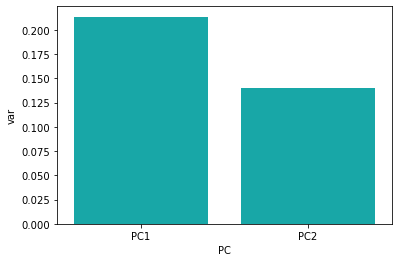

In [23]:
# Here we are curious as far as what the PCA components will yield
# so we plot out their explained variance

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [24]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))


The graph above will show us how our PCA values for the different entries appear in the different clusters denoted by the different colored regions

Next we want to go ahead and find out how the different features relate to this newly sectioned kmeans zones to see which features end up being the most in line with the zones

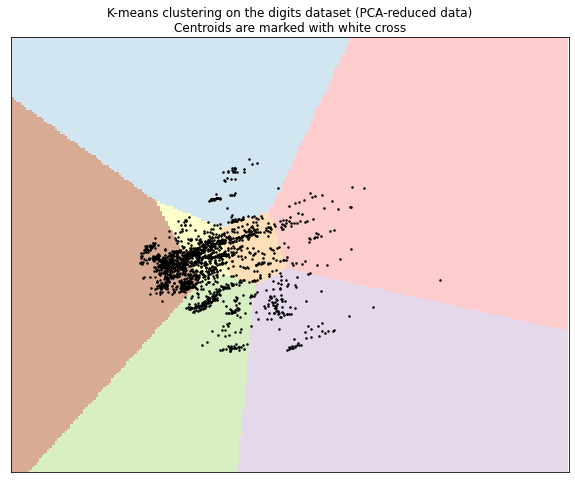

In [25]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(10,8))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Will show the clusters
           cmap=plt.cm.Paired, alpha = 0.5,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3) #plots the PCAed data

# Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)
            plt.figure(figsize=(10,8))
            plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Will show the clusters
                   cmap=plt.cm.Paired, alpha = 0.5,
                   aspect='auto', origin='lower')
            plt.scatter(reduced_data[:, 0], reduced_data[:,1], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.show()
            
        else:
            print(feature)
            plt.figure(figsize=(10,8))
            plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Will show the clusters
                   cmap=plt.cm.Paired, alpha = 0.5,
                   aspect='auto', origin='lower')
            plt.scatter(reduced_data[:,0], reduced_data[:,1], s = 10, alpha = 0.5, c=data_pd[feature])
            plt.colorbar()
            plt.show()
    except:
        pass

After running through all the different features the following ended up being the most interesting features

In [32]:
pot_recompl = [
    "TREAT_AVG_PRESSURE",
    "TREAT_MAX_PRESSURE",
    "MAX_PUMP_RATING",
    "STG_ELEMENT_TOP_DEPTH",
    "STG_ELEMENT_BOTTOM_DEPTH",
    "STG_FINAL_PUMPING_PRESSURE",
    "Prod_Per_Stage",
]

Next we want to make sure that those features selected are not heavy with NaN values. As the way we imputed the missing values, it could have caused them to sprout in a cluster of their own.

So we just check to make sure that there are less than 500 NaN values in that column. If they have more, then they won't be considered as a viable option.

In [33]:
i = 0
while(i < len(pot_recompl)):
    print(pot_recompl[i])
    if(mean_repl[pot_recompl[i]] > 500):
        pot_recompl.remove(pot_recompl[i])
    else:
        i += 1

TREAT_AVG_PRESSURE
TREAT_MAX_PRESSURE
MAX_PUMP_RATING
STG_ELEMENT_TOP_DEPTH
STG_ELEMENT_BOTTOM_DEPTH
STG_FINAL_PUMPING_PRESSURE
Prod_Per_Stage


In [35]:
pot_recompl

['TREAT_AVG_PRESSURE',
 'TREAT_MAX_PRESSURE',
 'MAX_PUMP_RATING',
 'STG_FINAL_PUMPING_PRESSURE',
 'Prod_Per_Stage']

In [36]:
imputed_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,MAX_PUMP_POWER,...,STG_BREAKDOWN_PRESSURE,STG_VOLUME_RECOVERED,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,PROPOSED,Prod_Per_Stage,Errors_Per_Stage
0,1.0,6740.0,5576.0,9358.0,9765.0,7346.000000,152125.0,1909.991929,12780.0,13932.000000,...,6740.0,0.0,16.000000,18.000000,13.000000,120.000000,12872.0,0.0,3218.482759,7.810345
1,1.0,5100.0,5724.0,7280.0,9347.0,5100.000000,0.0,0.000000,8618.0,12279.000000,...,5100.0,0.0,16.511719,18.158108,15.869792,112.623782,12991.0,0.0,0.000000,3.630435
2,1.0,4901.0,5087.0,4999.0,5384.0,6911.194934,0.0,0.000000,7864.0,15760.335826,...,4901.0,0.0,16.511719,18.158108,15.869792,112.623782,11793.0,0.0,2217.629630,2.814815
3,1.0,5304.0,5623.0,9496.0,9602.0,6911.194934,130000.0,1909.991929,11606.0,16880.000000,...,5304.0,0.0,18.000000,19.000000,18.000000,112.623782,12985.0,0.0,26156.490741,4.592593
4,1.0,7340.0,5494.0,9523.0,9916.0,6911.194934,366938.0,1909.991929,16441.0,19362.000000,...,7340.0,0.0,17.000000,18.000000,16.000000,0.000000,12685.0,0.0,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,6954.0,4844.0,8928.0,10377.0,6911.194934,192000.0,1909.991929,19547.0,23061.000000,...,6954.0,0.0,20.000000,21.000000,20.000000,55.000000,11188.0,0.0,1009.759259,4.398148
1650,1.0,4773.0,4837.0,8697.0,9622.0,6911.194934,192000.0,1909.991929,18982.0,21486.000000,...,4773.0,0.0,20.000000,21.000000,19.000000,62.000000,11173.0,0.0,1009.759259,4.398148
1651,1.0,5336.0,4829.0,8929.0,10049.0,6911.194934,192000.0,1909.991929,10545.0,22430.000000,...,5336.0,0.0,20.000000,21.000000,19.000000,62.000000,11152.0,0.0,1009.759259,4.398148
1652,1.0,6099.0,4818.0,9094.0,9721.0,6911.194934,192000.0,1909.991929,19694.0,21592.000000,...,6099.0,0.0,20.000000,21.000000,19.000000,61.000000,11128.0,0.0,1009.759259,4.398148


In [37]:
data_pd

,#WELL_NAME,CURRENT_STATUS,UWI,UWI_SIDETRACK,JOB_CATEGORY,JOB_START_DATE,JOB_END_DATE,JOB_STATUS,LIKE_KIND,PROJECT_TYPE,...,DURPUMP,SITE_SUPERVISOR,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Rig_Duration (days),Stg_Duration (hrs),Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage
0,WELL - 2019000699,Producing,2019000699,0,COMPLETIONS,12/16/2018 06:00:00,10/12/2019 10:00:00,COMPLETED,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,120.0,MIKE HOOSE,12872.0,12876,0.0,34,2,73,3218.482759,7.810345
1,WELL - 2019000665,Producing,2019000665,0,COMPLETIONS,01/21/2018 10:00:00,10/09/2018 07:00:00,COMPLETED,OCM - PP TUB,RECOMPLETION,...,NaN,NaN,12991.0,13064,0.0,9,9,5264,0.000000,3.630435
2,WELL - 2019000347,Producing,2019000347,0,COMPLETIONS,08/31/2017 13:00:00,NaN,NaN,OCM - PP PUC,RECOMPLETION,...,NaN,NaN,11793.0,11646,0.0,4,2,4486,2217.629630,2.814815
3,WELL - 2019001412,Producing,2019001412,0,COMPLETIONS,02/13/2019 07:30:00,NaN,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,NaN,CHRIS SANCHEZ,12985.0,12988,0.0,5,1,65,26156.490741,4.592593
4,WELL - 2019001390,Producing,2019001390,0,COMPLETIONS,04/04/2019 07:30:00,06/15/2019 18:00:00,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,0.0,JW KRAMER,12685.0,12676,0.0,9,2,148,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,WELL - 2019000628,Producing,2019000628,0,COMPLETIONS,05/31/2019 07:00:00,NaN,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,55.0,SEAN CHANCE,11188.0,11196,0.0,-1,0,80,1009.759259,4.398148
1650,WELL - 2019000628,Producing,2019000628,0,COMPLETIONS,05/31/2019 07:00:00,NaN,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,62.0,NATHAN JAYROE,11173.0,11186,0.0,-1,1,80,1009.759259,4.398148
1651,WELL - 2019000628,Producing,2019000628,0,COMPLETIONS,05/31/2019 07:00:00,NaN,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,62.0,NATHAN JAYROE,11152.0,11170,0.0,-1,1,80,1009.759259,4.398148
1652,WELL - 2019000628,Producing,2019000628,0,COMPLETIONS,05/31/2019 07:00:00,NaN,NaN,OCM - MECHANICAL ISOLATION,RECOMPLETION,...,61.0,NATHAN JAYROE,11128.0,11148,0.0,-1,1,80,1009.759259,4.398148


In [38]:
# This next part is to replace all the nan values that we had in our initial
# worksheet with their imputed values, so that we can export the data
# to use in our dashboard.

for feature in imputed_df:
    data_pd[feature] = imputed_df[feature]

In [39]:
# Lastly we also include the PCA data to include in our data to export.
data_pd["PCA-X"] = reduced_data[:,0]
data_pd["PCA-Y"] = reduced_data[:,1]

# Not necessary if you're just running through
data_pd.to_excel(from_path + "TO_TACC_RCOMPL-PCA.xlsx")

## Stimulation Stages Data

The process that is done in this next part is similar to the Recompletion stage, so there will fewer comments, the only difference between the two code wise happens after the features are compared to the kmeans graph

In [41]:
# read in data
data_pd = pd.read_excel(from_path + "TO_TACC_STM_STG.xlsx")

# Make sure there are no Contractors with NaN
subset = data_pd[data_pd['CONTRACTOR'].notnull()]

quant_df = subset.loc[:, subset.dtypes==float]
mean_repl = quant_df.isna().sum()
impute = lambda col: col.fillna(col.mean())
imputed_df = quant_df.apply(impute, axis=0)
imputed_df.dropna(inplace=True, axis=1)

In [42]:
mean_repl

FRAC_GRADIENT                      453
BREAKDOWN_PRESSURE                 316
HYDROSTATIC_PRESSURE               153
TREAT_AVG_PRESSURE                   6
TREAT_MAX_PRESSURE                   5
TREAT_MIN_PRESSURE                9798
PROPPANT_DESIGNED                    3
PROPPANT_IN_FORMATION                2
PROPPANT_IN_WELLBORE              7268
AVG_HYDRAULIC_POWER                 90
MAX_PUMP_POWER                     132
MAX_PUMP_RATING                   2919
TREAT_AVG_RATE                       6
TREAT_MAX_RATE                       5
TREAT_MIN_RATE                      26
POST_INSTANT_SHUT_IN_PRESSURE      854
INITIAL_SHUT_IN_PRESSURE            62
PRE_INSTANT_SHUT_IN_PRESSURE       428
STG_TOP_DEPTH                      170
STG_BOTTOM_DEPTH                   170
STG_ELEMENT_TOP_DEPTH            10767
STG_ELEMENT_BOTTOM_DEPTH         10772
STG_INITIAL_PUMPING_PRESSURE      9798
STG_FINAL_PUMPING_PRESSURE           5
STG_BREAKDOWN_PRESSURE             316
STG_VOLUME_RECOVERED     

In [43]:
imputed_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_FORMATION,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage
0,1.0,6547.0,4984.000000,9919.0,10176.0,6550.000000,104000.0,104060.0,0.000000,16793.0,...,17.077002,18.851715,16.328487,114.161617,11508.0,11504.0,0.000000,65.0,36707.875000,9.300000
1,1.0,7348.0,5031.000000,10027.0,10525.0,7348.000000,104000.0,104000.0,0.000000,22069.0,...,17.077002,18.851715,16.328487,114.161617,11598.0,11604.0,0.000000,65.0,35123.342105,9.078947
2,1.0,6740.0,5576.000000,9358.0,9765.0,7346.000000,152125.0,152125.0,6705.145891,12780.0,...,16.000000,18.000000,13.000000,120.000000,12872.0,12876.0,0.000000,73.0,3218.482759,7.810345
3,1.0,5100.0,5724.000000,7280.0,9347.0,5100.000000,0.0,0.0,0.000000,8618.0,...,17.077002,18.851715,16.328487,114.161617,12991.0,13064.0,0.000000,5264.0,0.000000,3.630435
4,1.0,6026.0,4696.000000,8298.0,9349.0,6026.000000,104000.0,104780.0,0.000000,13950.0,...,17.077002,18.851715,16.328487,114.161617,10829.0,10826.0,0.000000,65.0,23077.516129,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17716,1.0,7360.0,5695.000000,11086.0,11211.0,7628.501956,420000.0,420000.0,0.000000,22305.0,...,18.000000,20.000000,18.000000,103.000000,13130.0,13134.0,0.000000,144.0,-1.000000,-1.000000
17717,1.0,6913.0,5329.105134,9695.0,10136.0,7628.501956,420000.0,420000.0,0.000000,18958.0,...,16.000000,18.000000,15.000000,108.000000,11574.0,11573.0,0.011998,142.0,27219.318182,9.704545
17718,1.0,8132.0,5714.000000,10778.0,11080.0,7628.501956,420000.0,420000.0,0.000000,16239.0,...,18.000000,20.000000,17.000000,152.000000,13176.0,13176.0,0.000000,143.0,-1.000000,-1.000000
17719,1.0,7366.0,5329.105134,10098.0,10337.0,7628.501956,420000.0,422369.0,6705.145891,18315.0,...,17.000000,18.000000,16.000000,110.000000,11739.0,11735.0,0.000000,142.0,27219.318182,9.704545


In [44]:
# Standardize the numerical data

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df), columns=imputed_df.columns)

In [45]:
scaled_df

,FRAC_GRADIENT,BREAKDOWN_PRESSURE,HYDROSTATIC_PRESSURE,TREAT_AVG_PRESSURE,TREAT_MAX_PRESSURE,TREAT_MIN_PRESSURE,PROPPANT_DESIGNED,PROPPANT_IN_FORMATION,PROPPANT_IN_WELLBORE,AVG_HYDRAULIC_POWER,...,PUMPSONLINENO,USERNUM1,USERNUM3,DURPUMP,TOP_DEPTH_TVD,BOTTOM_DEPTH_TVD,PROPOSED,Stage_Length (meters),Prod_Per_Stage,Errors_Per_Stage
0,0.5,0.585076,0.101956,0.870546,0.092136,0.596974,0.072235,0.072276,0.000000,0.071947,...,0.776227,0.725066,0.742204,0.185327,0.837434,0.836960,0.000000,0.336200,0.077224,0.060234
1,0.5,0.656658,0.102917,0.880025,0.095296,0.669705,0.072235,0.072235,0.000000,0.094551,...,0.776227,0.725066,0.742204,0.185327,0.843987,0.844239,0.000000,0.336200,0.073890,0.058941
2,0.5,0.602324,0.114066,0.821309,0.088415,0.669522,0.105661,0.105661,0.005161,0.054754,...,0.727273,0.692308,0.590909,0.194805,0.936736,0.936822,0.000000,0.337094,0.006773,0.051522
3,0.5,0.455764,0.117094,0.638933,0.084630,0.464820,0.000000,0.000000,0.000000,0.036922,...,0.776227,0.725066,0.742204,0.185327,0.945399,0.950506,0.000000,0.916899,0.000002,0.027079
4,0.5,0.538517,0.096064,0.728278,0.084648,0.549216,0.072235,0.072777,0.000000,0.059766,...,0.776227,0.725066,0.742204,0.185327,0.788002,0.787612,0.000000,0.336200,0.048550,0.064327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17716,0.5,0.657730,0.116500,0.972968,0.101508,0.695270,0.291717,0.291717,0.000000,0.095562,...,0.818182,0.769231,0.818182,0.167208,0.955518,0.955601,0.000000,0.345024,0.000000,0.000000
17717,0.5,0.617784,0.109015,0.850886,0.091774,0.695270,0.291717,0.291717,0.000000,0.081222,...,0.727273,0.692308,0.681818,0.175325,0.842239,0.841983,0.011998,0.344801,0.057263,0.062600
17718,0.5,0.726720,0.116889,0.945936,0.100321,0.695270,0.291717,0.291717,0.000000,0.069573,...,0.818182,0.769231,0.772727,0.246753,0.958867,0.958658,0.000000,0.344912,0.000000,0.000000
17719,0.5,0.658266,0.109015,0.886256,0.093594,0.695270,0.291717,0.293363,0.005161,0.078467,...,0.772727,0.692308,0.727273,0.178571,0.854252,0.853774,0.000000,0.344801,0.057263,0.062600


In [46]:
data = scaled_df.to_numpy()

In [47]:
data

array([[0.5       , 0.58507596, 0.10195565, ..., 0.33620016, 0.07722364,
        0.06023392],
       [0.5       , 0.65665773, 0.10291711, ..., 0.33620016, 0.07389029,
        0.05894121],
       [0.5       , 0.6023235 , 0.11406595, ..., 0.33709371, 0.00677275,
        0.05152248],
       ...,
       [0.5       , 0.72672029, 0.11688896, ..., 0.34491232, 0.        ,
        0.        ],
       [0.5       , 0.65826631, 0.10901532, ..., 0.34480063, 0.05726277,
        0.06259968],
       [0.5       , 0.65308311, 0.10901532, ..., 0.34480063, 0.05726277,
        0.06259968]])

In [49]:
# Run the numerical data through PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Establish then run data through kmeans clustering
kmeans = KMeans(init='random', n_clusters=7, n_init=10)

kmeans.fit(reduced_data)

[0.35659334 0.26206584]
0.6186591797043796


KMeans(init='random', n_clusters=7)

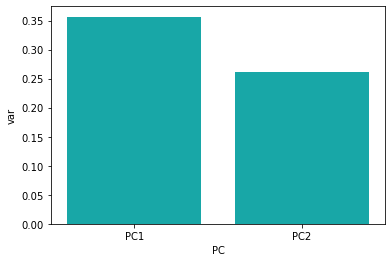

In [50]:
# Plot the explained variance for the PCA components

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [51]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

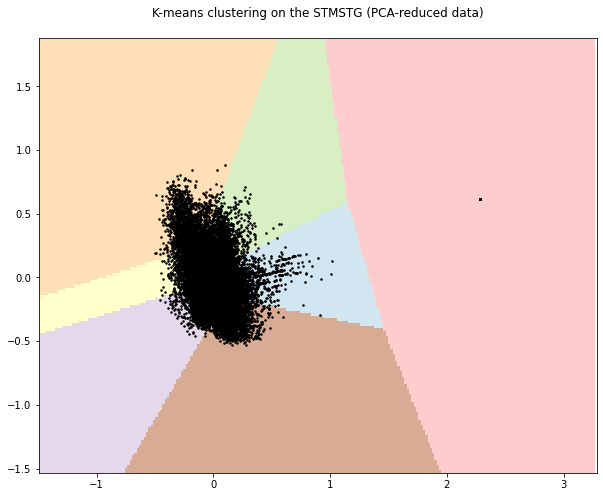

In [52]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(10,8))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Will show the clusters
           cmap=plt.cm.Paired, alpha = 0.5,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=3) #plots the PCAed data

# Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
plt.title('K-means clustering on the STMSTG (PCA-reduced data)\n')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()

Here is the kmeans zones that were spit out by the algorithm. Here it looks pretty ugly, but the unique thing here is the lone dot in the red zone. That is most likly due to the imputation method that we chose.

In [ ]:
for feature in data_pd.columns.values:
    try:
        if data_pd[feature].dtypes != 'float64':
            imputed_D2 = data_pd[feature].fillna('missing')
            le = LabelEncoder()
            ft = le.fit_transform(imputed_D2.values)
            tickers = le.inverse_transform(np.unique(ft))
            print(feature)
            plt.figure(figsize=(10,8))
            plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Will show the clusters
                   cmap=plt.cm.Paired, alpha = 0.5,
                   aspect='auto', origin='lower')
            plt.scatter(reduced_data[:, 0], reduced_data[:,1], s = 10, alpha = 0.5, c=ft, cmap=plt.cm.get_cmap('tab20', len(tickers)))
            cb = plt.colorbar(ticks=range(len(tickers)))
            cb.set_ticklabels(tickers)
            plt.clim(-0.5, len(tickers)-0.5)
            plt.title(feature)
            plt.show()
            
        else:
            print(feature)
            plt.figure(figsize=(10,8))
            plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # Will show the clusters
                   cmap=plt.cm.Paired, alpha = 0.5,
                   aspect='auto', origin='lower')
            plt.scatter(reduced_data[:,0], reduced_data[:,1], s = 10, alpha = 0.5, c=data_pd[feature])
            plt.colorbar()
            plt.title(feature)
            plt.show()
    except:
        pass

After running all the features through that kmeans zones, it would appear that the features that are most in line with the zones are:

In [53]:
pot_stmstg = [
    "BREAKDOWN_PRESSURE",
    "TREAT_AVG_PRESSURE",
    "PROPPANT_IN_FORMATION",
    "POST_INSTANT_SHUT_IN_PRESSURE",
    "INITIAL_SHUT_IN_PRESSURE",
    "STG_INITIAL_PUMPING_PRESSURE",
    "Stg_Duration (hrs)"
]


i = 0
while(i < len(pot_stmstg)):
    if(pot_stmstg[i] in mean_repl and mean_repl[pot_stmstg[i]] > 1000):
        pot_stmstg.remove(pot_stmstg[i])
    else:
        i += 1
        
pot_stmstg

['BREAKDOWN_PRESSURE',
 'TREAT_AVG_PRESSURE',
 'PROPPANT_IN_FORMATION',
 'POST_INSTANT_SHUT_IN_PRESSURE',
 'INITIAL_SHUT_IN_PRESSURE',
 'Stg_Duration (hrs)']

In [55]:
# lastly go ahead and replace the Nans so that we have something for our dashboard

for feature in imputed_df:
    data_pd[feature] = imputed_df[feature]

In [56]:
# Include the PCA components
data_pd["PCA-X"] = reduced_data[:,0]
data_pd["PCA-Y"] = reduced_data[:,1]


# Then export (Not necessary if you don't want it)
data_pd.to_excel(from_path + "TO_TACC_STM_STG-PCA.xlsx")